# Milestone 2 - Hypothesis Simulation 

## Author - Ana Javed



## Instructions
Use the <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">automotive data set</a> to perform the following:

1. Identify a likely distribution for price and several other features.
2. Compute basic summary statistics by both classical, bootstrap, and Bayesian methods
3. Compute confidence intervals for these summary statistics by classical, bootstrap, and Bayesian methods
4. Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
            Classical tests
            Tukey’s Honest Significant Differences (HSD)
            Bootstrap methods
            Bayesian model


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [2]:
# Import libraries & packages required 
import pandas as pd
import numpy as np 
import scipy as scipy 
from scipy import stats
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import numpy.random as nr
from matplotlib import pyplot
from statsmodels.stats.multicomp import pairwise_tukeyhsd 

# Declaring inline visualizations 
%matplotlib inline


In [3]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

# Reading file into a Pandas Dataframe 
Auto = pd.read_csv(fileName)

### Some Exploratory Data Analysis 
# print(Auto.describe()) # Summary Statistics

# print(Auto.shape) # DF dimensions

# Auto.head(5) # Top 5 rows


### 1.) Identify a likely distribution for price and several other features. 
For example, you should determine if the price is better represented by the log of price.

In [4]:
#### Creating New A few New Columns: Log Price, Log City-MPG, Log engine-size , and Log Length

############ Log Price 
# Converting Unknown "?" Values in Price Column 
Auto.loc[:,'price'] = pd.to_numeric(Auto.loc[:,'price'], errors='coerce')    
HasNan1 = np.isnan(Auto.loc[:,'price'])
Auto.loc[HasNan1,'price'] = np.nanmedian(Auto.loc[:,'price'])

# Creating New Log Price Column from Price Column
Auto.loc[:, "LogPrice"] = np.log(Auto.loc[:, "price"])

# Verifying Output looks correct
# print(Auto.loc[:, "price"].value_counts()) 
# print(Auto.loc[:, "LogPrice"].value_counts()) 

############ Log City-MPG 
# Converting Unknown "?" Values in city-mpg Column 
Auto.loc[:,'city-mpg'] = pd.to_numeric(Auto.loc[:,'city-mpg'], errors='coerce')    
HasNan1 = np.isnan(Auto.loc[:,'city-mpg'])
Auto.loc[HasNan1,'city-mpg'] = np.nanmedian(Auto.loc[:,'city-mpg'])

## Creating New Log city-mpg Column from city-mpg Column
Auto.loc[:, "log-city-mpg"] = np.log(Auto.loc[:, "city-mpg"])


############ Log Engine Size 
# Converting Unknown "?" Values in engine-size  Column 
Auto.loc[:,'engine-size'] = pd.to_numeric(Auto.loc[:,'engine-size'], errors='coerce')    
HasNan1 = np.isnan(Auto.loc[:,'engine-size'])
Auto.loc[HasNan1,'engine-size'] = np.nanmedian(Auto.loc[:,'engine-size'])

## Creating New Log engine-size Column from engine-size Column
Auto.loc[:, "log-engine-size"] = np.log(Auto.loc[:, "engine-size"])


############ Log Engine Size 
# Converting Unknown "?" Values in length Column 
Auto.loc[:,'length'] = pd.to_numeric(Auto.loc[:,'length'], errors='coerce')    
HasNan1 = np.isnan(Auto.loc[:,'length'])
Auto.loc[HasNan1,'length'] = np.nanmedian(Auto.loc[:,'length'])

## Creating New Log length Column from length Column
Auto.loc[:, "loglength"] = np.log(Auto.loc[:, "length"])



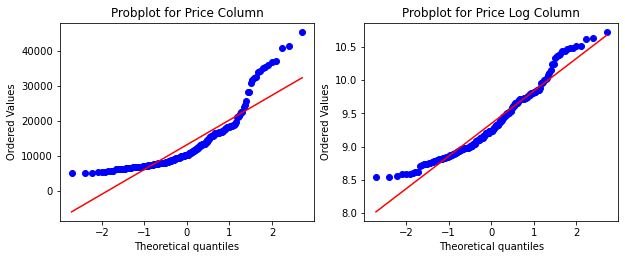

In [5]:
#### Creating a Q-Q Plot for a Normal Distribution

## Function to Create Q-Q Plot 
def qq_plot(vec1, vec2, title_name, color = "blue"):
    import matplotlib.pyplot as plt
    import scipy.stats as ss
    
    plt.figure(figsize=(10, 8)).gca() # define axis
    
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1, dist ='norm') ## Plot the left subplot
    ax1.set_title("Probplot for {0} Column".format(title_name))
    ax1.get_lines()[0].set_markerfacecolor(color)
    
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1, dist = 'norm') ## Plot the right subplot
    ax1.set_title("Probplot for {0} Log Column".format(title_name))
    ax1.get_lines()[0].set_markerfacecolor(color)
    
# Passing Price and LogPrice Columns to the Q-Q Plot Function
qq_plot(Auto.loc[:, 'price'], Auto.loc[:, 'LogPrice'], "Price", 'blue')    


With these q-q plots for price, we visually see a greater distance at the top and bottom for Price column. The LogPrice column also has this curvature, but it is not as large. Price Log has a better fit to the line. 

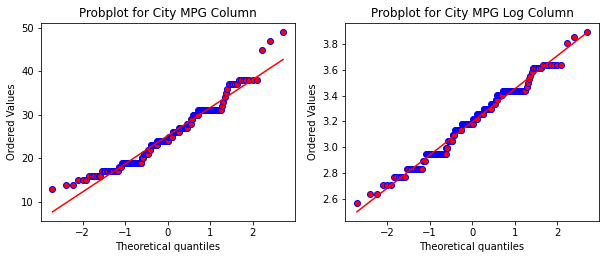

In [6]:
# Passing City MPG and Log City MPG Columns to the Q-Q Plot Function
qq_plot(Auto.loc[:, 'city-mpg'], Auto.loc[:, 'log-city-mpg'], "City MPG", "red")    

With these q-q plots for city-mpg, we visually see a greater distance at the top and bottom for the city-mpg column. The Log City MPG column also has this pattern, but it is not as large and it is closer to the line. Log City MPG is a better fit. 

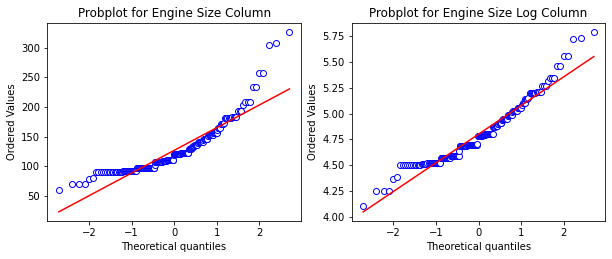

In [7]:
# Passing Engine Size and Log Engine Size Columns to the Q-Q Plot Function
qq_plot(Auto.loc[:, 'engine-size'], Auto.loc[:, 'log-engine-size'], "Engine Size", "white")    

With these q-q plots for engine size, we visually see a greater distance at the top and bottom for the engine size column. The Log engine size column also has this pattern, but the distance is minimal, and it too is closer to the line. Log Engine Size is a better fit. 

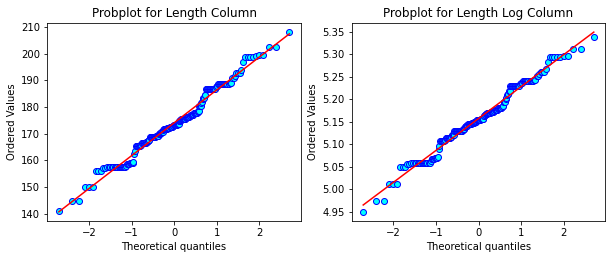

In [8]:
# Passing length and Log length Columns to the Q-Q Plot Function
qq_plot(Auto.loc[:, 'length'], Auto.loc[:, 'loglength'], "Length", "cyan")    

With these q-q plots for length, we visually see a slightly bigger distance at the top and bottom for the Log length column. The regular length column is closer to the normal distribution line and is a better fit than the log length column. 

### 2.) Compute basic summary statistic of the mean by both classical bootstrap and Bayesian methods 

I will move forward with the assignment using one column, specifically the LogPrice Column since it was a better fit to the normal distribution than the Price column.

In [9]:
## Gathering Sample Statistics for LogPrice
Auto.loc[:, "LogPrice"].describe()

# mean  =     9.347955
# std   =     0.497540

count    205.000000
mean       9.347955
std        0.497540
min        8.540519
25%        8.960339
50%        9.239414
75%        9.711116
max       10.723267
Name: LogPrice, dtype: float64

<AxesSubplot:xlabel='LogPrice', ylabel='Density'>

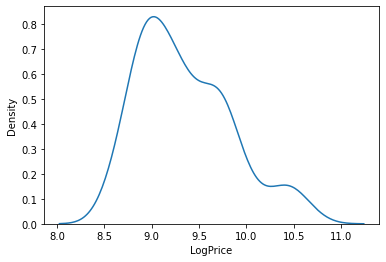

In [10]:
## Creating a density plot of LogPrice to visualize the distribution prior to bootstrapping
sns.kdeplot(Auto.loc[:, "LogPrice"])

##### Bootstrapping LogPrice over 10,000 samples: 

In [11]:
## Function to Plot a Histogram + Confidence Intervals 
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    pyplot.hist(x, alpha=.5)
    pyplot.axvline(x.mean())
    # 95% confidence interval    
    pyplot.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    pyplot.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)
    
    print("Confidence Interval Range: ", 
          np.percentile(x, p/2.)," to " , 
          np.percentile(x, 100-p/2.))


Confidence Interval Range:  9.28100323171516  to  9.415390558974442
--------------------------
Bootstrapping Price Mean: 
9.347993669006504


LogPrice Sample Mean: 
9.347954638082927
--------------------------


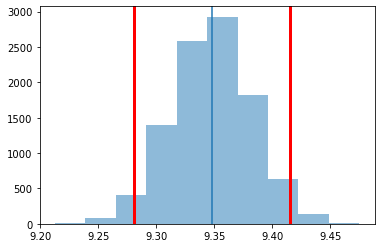

In [12]:
## Bootstrapping the LogPrice Mean
n = 10000  # going to conduct 10,000 realizations 

LogPrice_bootstrap_means = pd.Series([
    Auto.sample(frac=1, replace=True).LogPrice.mean()
    for i in range(n)])

## Plotting the Distribution of Bootstrapped LogPrice Means 
plot_hist(LogPrice_bootstrap_means)


## Printing out the Values of the Bootstrapped Mean & Std vs Sample Mean & Std 
print("--------------------------")
print("Bootstrapping Price Mean: ")
print(LogPrice_bootstrap_means.mean())

print("\n")

print("LogPrice Sample Mean: ")
print(Auto.loc[:, "LogPrice"].mean())

print("--------------------------")


Confidence Interval Range:  0.4497717813803394  to  0.5417954967409946
--------------------------
Bootstrapping Price Std: 
0.49609793032395044


LogPrice Sample Std: 
0.4975398650134552
--------------------------


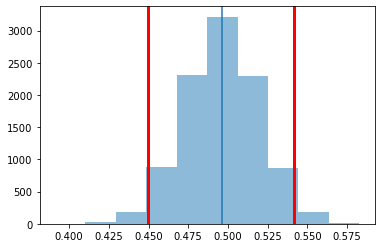

In [13]:
## Bootstrapping the LogPrice Std
n = 10000  # going to conduct 10,000 realizations 

## Bootstrapping the Standard Deviation 
LogPrice_bootstrap_std = pd.Series([
    Auto.sample(frac=1, replace=True).LogPrice.std()
    for i in range(n)])


## Plotting the Distribution of Bootstrapped LogPrice Standard Deviations   
plot_hist(LogPrice_bootstrap_std)


## Printing out the Values of the Bootstrapped Mean & Std vs Sample Mean & Std 
print("--------------------------")
print("Bootstrapping Price Std: ")
print(LogPrice_bootstrap_std.mean()) # mean standard deviation 

print("\n")

print("LogPrice Sample Std: ")
print(Auto.loc[:, "LogPrice"].std())
print("--------------------------")


##### Bayesian Method for Mean & Standard Deviation 

In [14]:
## Defining functions to calculate posterior & likelihood, mean, and standard deviation

def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

def likelihood(p, data):
    k = sum(data)
    N = len(data)
    # Compute Binomial likelihood
    l = scipy.special.comb(N, k) * p**k * (1-p)**(N-k)
    # Normalize the likelihood to sum to unity
    return l/sum(l)


Mean = 9.336, Standard deviation = 0.490


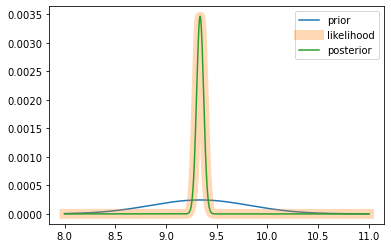

In [15]:
## Creating a Prior Distribution of LogPrice (Mean)

N = 10000 
p = np.linspace(8, 11, num=N) 

num_samples = 200 # number of samples from sample dataset 
Auto_samples = Auto.sample(n=num_samples) # sampling dataset without replacement 

pp_price = ss.norm.pdf(p, loc=Auto_samples.LogPrice.mean(), 
                          scale=Auto_samples.LogPrice.std())

pp_price = pp_price / pp_price.sum() # normalizing price 

like_price = comp_like(p, Auto_samples.LogPrice)
post_price = posterior(pp_price, like_price)

pyplot.plot(p, pp_price, label='prior')
pyplot.plot(p, like_price, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_price, label='posterior')
pyplot.legend()


#### Analysis of Mean & Standard Deviations from Bootstrapping vs Bayesian Method 

When Bootstrapping the mean of LogPrice (10000 samples), the bootstrapped mean was 9.3475 where the sample mean was 9.3479. There is a very small difference between the two (about 0.0004), which means the sample mean is quite close to the boostrapped mean of 10000 samples.  The 95% confidence interval for this is 9.2793 to 9.4166.  

When Bootstrapping the standard deviation (10000 samples), the bootstrapped standard deviation was 0.4956 and the sample standard deviation was 0.4975. There is a smalled difference between the two, specifically 0.0019 difference. The 95% confidence interval for this is 0.4486 to 0.5411. 

When applying the Bayseian Method, the posterior distribution has 9.350 mean, which is very close to the bootstrapped mean (specifically 9.3475). 

This shows that both Bootstrapping and applying the Bayesian method will provide means that are relatively close to one another.

### 3.) Compute confidence intervals for the summary statistics by classical bootstrap and Bayesian methods

In [16]:
## Bootstrapping Confidence Interval (calculated initially above)
print("Confidence Interval Range - Bootstrapping Method: \n", 
  np.percentile(LogPrice_bootstrap_means, (5/2.))," to " , 
  np.percentile(LogPrice_bootstrap_means, 100-(5/2.))
       )


Confidence Interval Range - Bootstrapping Method: 
 9.28100323171516  to  9.415390558974442


The 0.950 credible interval is 0.025 to 0.975 

The confidence interval for Bayesian method is from 
 9.270027002700271  to  9.403540354035403


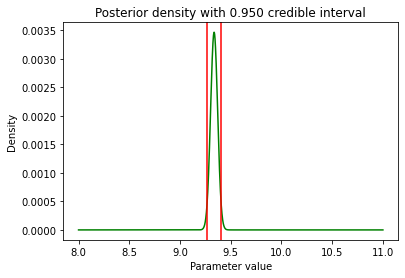

In [17]:
## Bayesian Credible Intervals 
num_samples = 10000
lower_q, upper_q = [.025, .975]

def plot_ci(p, post, num_samples, lower_q, upper_q):
    ## This function computes a credible interval using an assumption
    ## of symetry in the bulk of the distribution to keep the calculation simple. 
    ## Compute a large sample by resampling with replacement
    samples = np.random.choice(p, size=num_samples, replace=True, p=post)
    ci = np.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    pyplot.title('Posterior density with %.3f credible interval' % interval)
    pyplot.plot(p, post, color='green')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.axvline(x=ci[0], color='red')
    pyplot.axvline(x=ci[1], color='red')
    print('The %.3f credible interval is %.3f to %.3f \n' 
          % (interval, lower_q, upper_q))
    print("The confidence interval for Bayesian method is from \n"
          , ci[0], " to ", ci[1])
    
plot_ci(p, post_price, num_samples, lower_q, upper_q)

#### Analysis of CI from Bootstrapping vs Bayesian Method 

The 95% confidence interval from Bootstrapping is 9.279 to 9.416. The 95% confidence interval from the Bayesian method is 9.282 to  9.421. These are very close to one another and show that regardless of using Bootstrapping or the Bayesian method, one can produce very similar results for the analysis they are conducting. 

### 4.) Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are statistically significant. You will continue the analysis that you started in Assignment 04. For each of the groupings you analyzed in Assignment 04, apply the following methods:

   -  Bootstrap methods
   -  Bayesian model


In [18]:
### Defining Functions to assist conducting the T-test and Plotting Results 

## Histogram Plot 
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
## Confidence Interval on Histogram 
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
## Function to Plot T-Tests 
def plot_t(a, b, t_test, cols=['A', 'B'], nbins = 20):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(7, 8))
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histogram of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
## Function for Non-paired T Tests
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   

In [19]:
### Bootstrapping Aspiration=Std Column 

n = 1000  # going to conduct 1,000 realizations 

# Separating the categories for Aspiration: 
std = Auto.loc[Auto.loc[:, 'aspiration'] == 'std', 'LogPrice']
turbo = Auto.loc[Auto.loc[:, 'aspiration'] == 'turbo', 'LogPrice']

## Bootstrapping the Mean of the Standard Aspiration
std_bootstrap_mean = pd.Series([
    std.sample(frac=1, replace=True).mean()
    for i in range(n)])


# ## Plotting the Distribution of Bootstrapped Aspiration=Std mean 
# plot_hist(std_bootstrap_mean)


## Printing out the Values of the Bootstrapped Means
print("--------------------------")
print("Bootstrapping Aspiration=Std Price Mean: ")
print(std_bootstrap_mean.mean()) 

######################################################
## Bootstrapping the Mean of the Turbo Aspiration 
turbo_bootstrap_mean = pd.Series([
    turbo.sample(frac=1, replace=True).mean()
    for i in range(n)])

# ## Plotting the Distribution of Bootstrapped Turbo Aspiration Means  
# plot_hist(turbo_bootstrap_mean)


## Printing out the Values of the Bootstrapped Means
print("--------------------------")
print("Bootstrapping Aspiration=Turbo Price Mean: ")
print(turbo_bootstrap_mean.mean()) # mean 


--------------------------
Bootstrapping Aspiration=Std Price Mean: 
9.290011781277
--------------------------
Bootstrapping Aspiration=Turbo Price Mean: 
9.612760621120625


DegFreedom    1667.097727
Difference      -0.322749
Statistic     -136.819197
PValue           0.000000
Low95CI         -0.327376
High95CI        -0.318122
dtype: float64


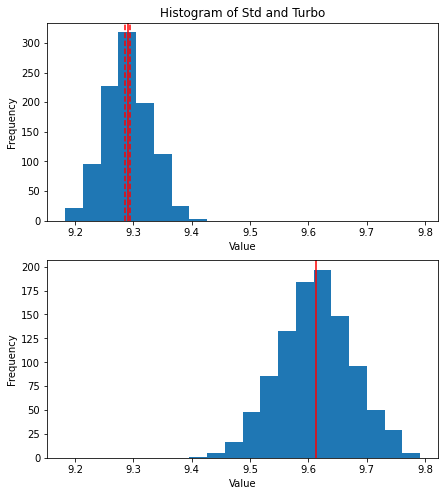

In [20]:
## T-Test on Bootstrapped Std and Bootstrapped Turbo Mean 

# Applying the t-test
Aspiration_type_2 = t_test(std_bootstrap_mean, turbo_bootstrap_mean, alpha = 0.05)
print(Aspiration_type_2)

# Plotting results in a histogram 
plot_t(std_bootstrap_mean, turbo_bootstrap_mean, Aspiration_type_2, cols=["Std", "Turbo"]) 


#### Analysis of the Bootstrapping T-Test (Aspiration) 



For Aspiration type, the t-test conducted on the bootstrapped std and turbo groups showed a small p-value of 0.0000, a small difference in means, a large degrees of freedom, and a CI that did not contain 0. From this we can reject the null hypothesis and there is a good chance that the difference in price means between the groups is not from random fluctuation/chance.

-------- Bayesian Method - Aspiration = std: ----------- 
Mean = 9.278, Standard deviation = 0.497


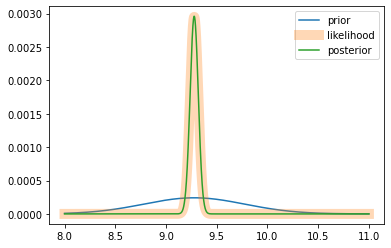

In [21]:
## Bayesian Method on Aspiration Column 

## Creating a Prior, Likelihood, and Posterior Distribution of Aspiration = std (Mean)

print("-------- Bayesian Method - Aspiration = std: ----------- ")
N = 10000 
p = np.linspace(8, 11, num=N) 

num_samples = 150 # number of samples from sample dataset 
std_samples = std.sample(n=num_samples) # sampling dataset without replacement 

pp_price = ss.norm.pdf(p, loc=std_samples.mean(), 
                          scale=std_samples.std())

pp_price = pp_price / pp_price.sum() # normalizing price 

like_price = comp_like(p, std_samples)
post_price_std = posterior(pp_price, like_price)

pyplot.plot(p, pp_price, label='prior')
pyplot.plot(p, like_price, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_price_std, label='posterior')
pyplot.legend()


-------- Bayesian Method - Aspiration = turbo: ----------- 
Mean = 9.612, Standard deviation = 0.390


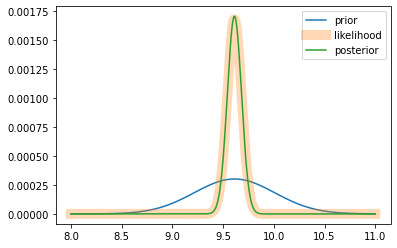

In [22]:
## Creating a Prior, Likelihood, and Posterior Distribution of Aspiration = Turbo (Mean)

print("-------- Bayesian Method - Aspiration = turbo: ----------- ")

N = 10000 
p = np.linspace(8, 11, num=N) 

num_samples = 30 # number of samples from sample dataset 
turbo_samples = turbo.sample(n=num_samples) # sampling dataset without replacement 

pp_price = ss.norm.pdf(p, loc=turbo_samples.mean(), 
                          scale=turbo_samples.std())

pp_price = pp_price / pp_price.sum() # normalizing price 

like_price = comp_like(p, turbo_samples)
post_price_turbo = posterior(pp_price, like_price)

pyplot.plot(p, pp_price, label='prior')
pyplot.plot(p, like_price, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_price_turbo, label='posterior')
pyplot.legend()


In [23]:
## T-Test on Bayesian Aspiration (Std & turbo) Mean

# Applying the t-test
Aspiration_type_3 = t_test(post_price_std, post_price_turbo, alpha = 0.05)
print(Aspiration_type_3)


DegFreedom    1.849408e+04
Difference   -1.219727e-19
Statistic    -2.190236e-14
PValue        1.000000e+00
Low95CI      -1.091562e-05
High95CI      1.091562e-05
dtype: float64


---------- CI for Standard Aspiration Prices: ----------
The 0.950 credible interval is 0.025 to 0.975 

The confidence interval for Bayesian method is from 
 9.198619861986199  to  9.357635763576358


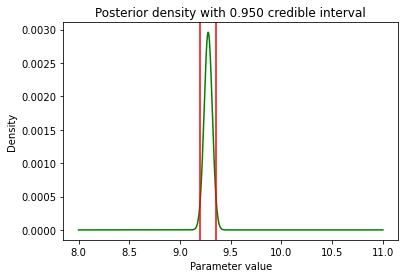

In [24]:
## Plotting Posterior Distribution and CI of the mean of Standard Aspiration Prices 
print("---------- CI for Standard Aspiration Prices: ----------")
num_samples = 100000

plot_ci(p, post_price_std, num_samples, lower_q=.025, upper_q=.975)

---------- CI for Turbo Aspiration Prices: ----------
The 0.950 credible interval is 0.025 to 0.975 

The confidence interval for Bayesian method is from 
 9.474047404740475  to  9.747974797479749


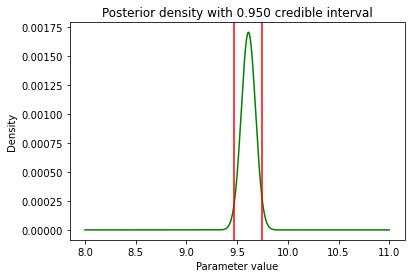

In [25]:
## Plotting Posterior Distribution and CI of the mean of Turbo Aspiration Prices 
print("---------- CI for Turbo Aspiration Prices: ----------")

plot_ci(p, post_price_turbo, num_samples, lower_q=.025, upper_q=.975)

#### Analysis of the Bayesian Method T-Test Results (Aspiration) 
For Aspiration type, the t-test conducted on the std and turbo groups after applying the Bayesian method showed a p-value of 1.0000, a small t-statistic, and a CI that does contain 0. This does not seem to support the findings of previous analysis, however, the CI plots between the standard aspiration vs turbo aspiration show that the CI do not overlap each other. We can say that with 95% certainty, the prices of standard aspiration and prices of turbo aspiration are significantly different from each other. 

### 5.) Compare the results from step 4 above with those you found in Assignment 04 with classical t-tests, Tukey HSD, and ANOVA.

When conducting the classic t-test on Aspiration types, the t-test conducted on the std and turbo groups showed a small p-value of 0.00004, a small difference in means, a large t-statistic, and a CI that did not contain 0. From this we rejected the null hypothesis (since p < alpha) and there is a good chance that the difference in price means between the groups is not from random fluctuation. 

In [26]:
## Calculating the Tukey HSD for Aspiration Categories: 
Tukey_HSD = pairwise_tukeyhsd(Auto.LogPrice, Auto.aspiration)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   std  turbo   0.3265 0.001 0.1537 0.4992   True
-------------------------------------------------


Above is a Tukey HSD analysis - which conducts a pairwise group analysis on the turbo and standard aspiration. We see that the upper and lower CI levels do not contain zero and that the groups are truly different from each other. We reject the null hypothesis that these two groups are the same. 

In [27]:
## Calculating the F-statistic and p-value for ANOVA Analysis
f_statistic, p_value = ss.f_oneway(std, turbo) 

print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 13.877893412762756
P-value = 0.0002528012774381665


Above is the ANOVA analysis for aspiration groups. The F statistic is quite large and the p-value is small. Once again, we can reject the null hypothesis that the turbo and standard aspiration categories have the same price. The probability of the differences being due to random chance is low.


In summary, the classic t-test, ANOVA, Tukey HSD, bootstrapping and bayesian method analsis all point to the same findings - that the aspiration groups (standard and turbo) do have significantly different price groups. 